In [87]:
!pip install seaborn
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV,LinearRegression,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
import pandas.testing as tm
from pprint import pprint
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,TruncatedSVD

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [ ]:
california_ds=datasets.fetch_california_housing()
#california_ds.data
#california_ds.target
#california_ds.feature_names


Creating a Dataframe to represent the housing data in 2D(rows and columns) 

In [ ]:
data_set = pd.DataFrame(california_ds.data, columns=california_ds.feature_names)
data_set['target'] = pd.Series(california_ds.target)
data_set.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Data Exploration

In [ ]:
data_set.shape

(20640, 9)

In [ ]:
data_set.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Preprocessing the data

Checking for null values in each column

In [ ]:
data_set.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

since there are no null values, we can visualize the data using seaborn to see the relationships between the columns

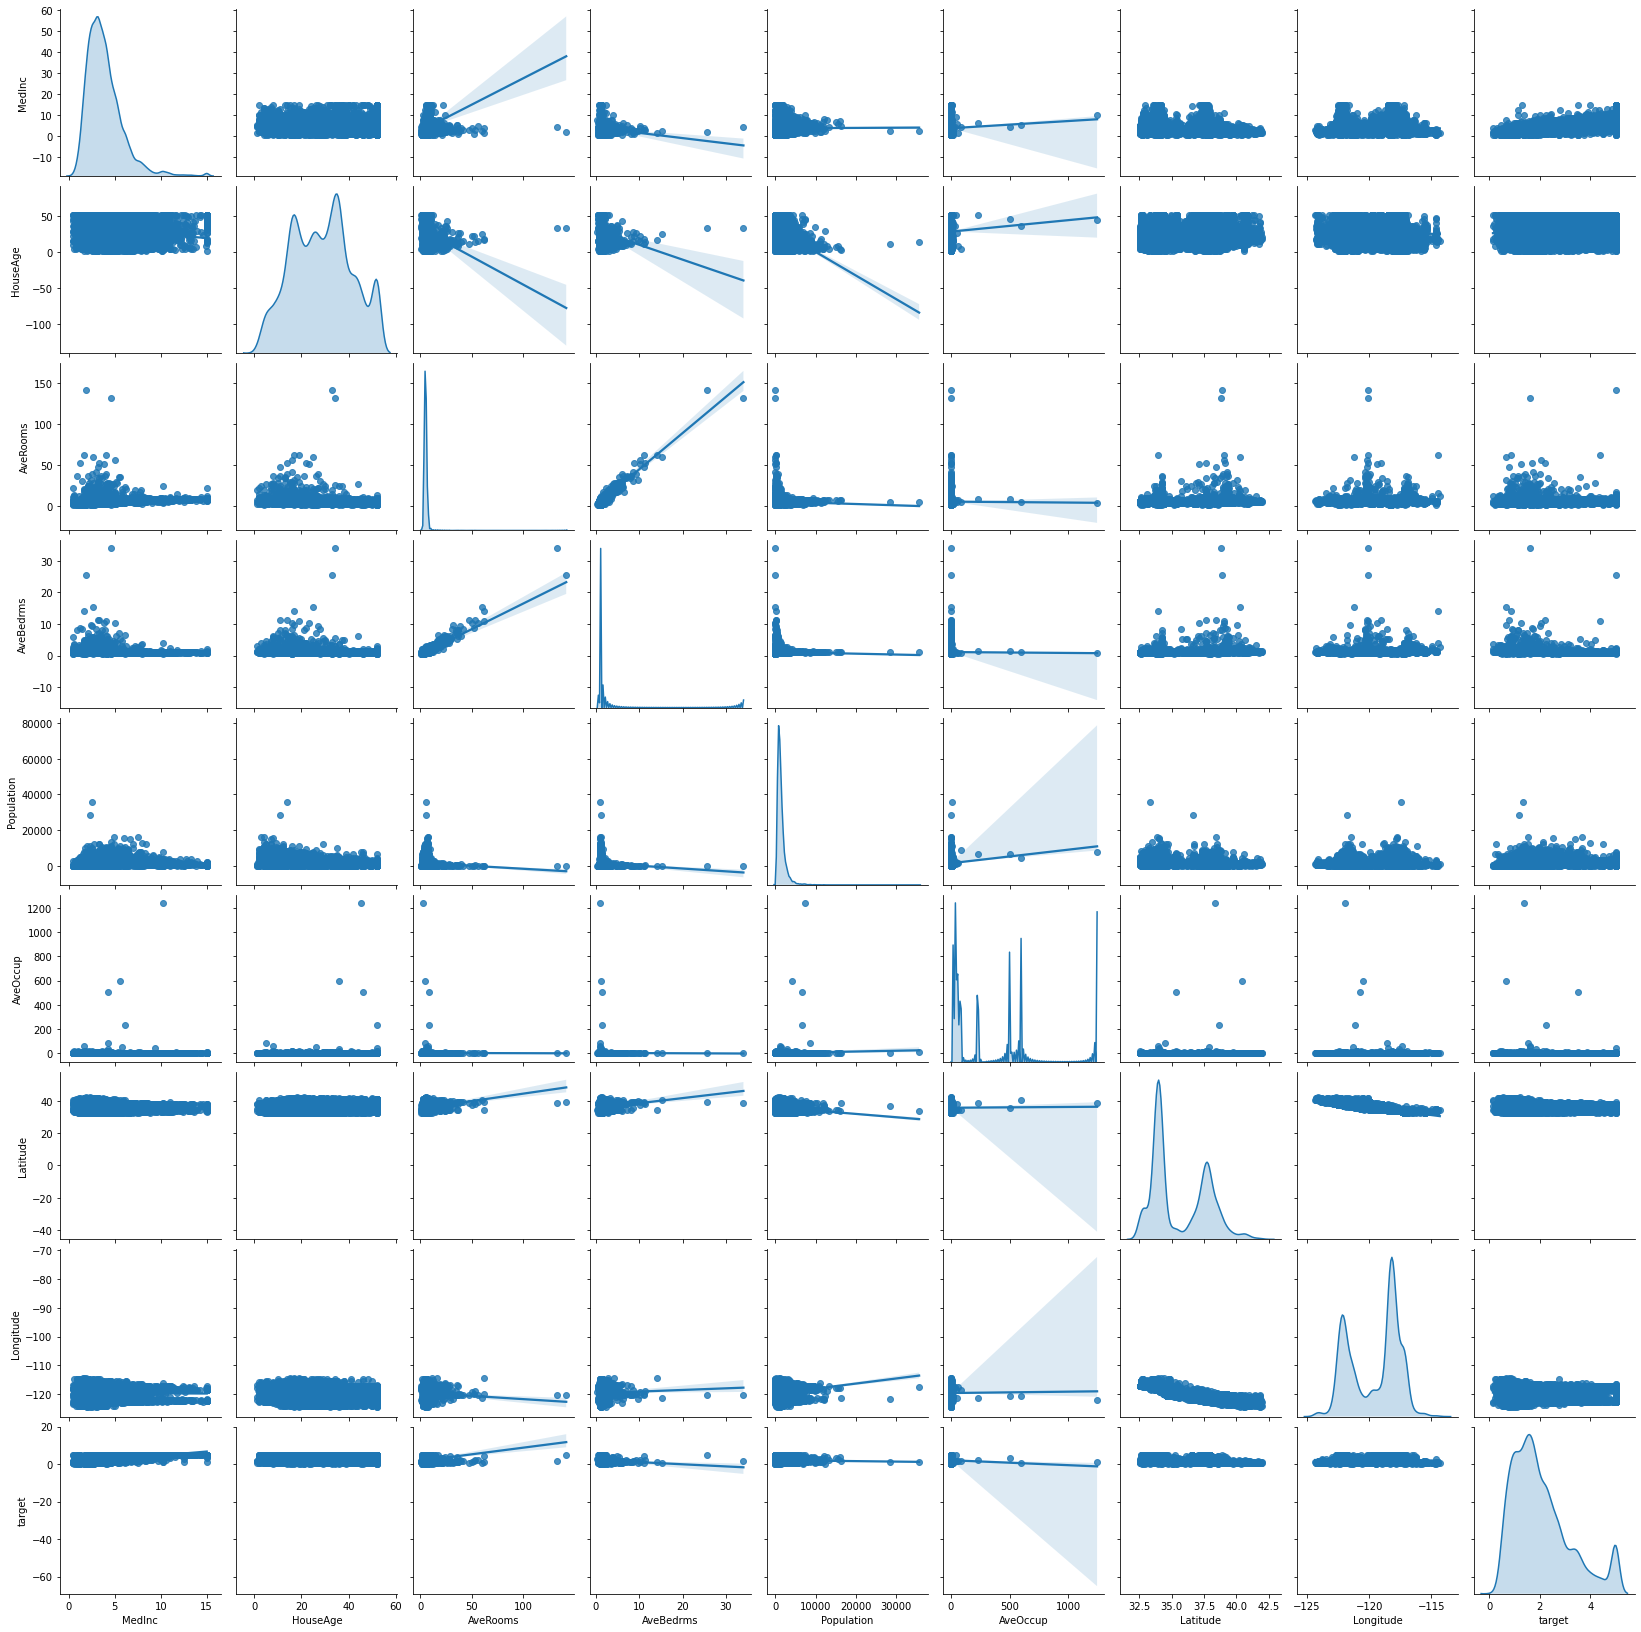

In [ ]:
copy_data=data_set.copy()
sns.pairplot(copy_data,kind='reg',diag_kind='kde')

Feature Selection using L1

In [ ]:
#copy_data
X=copy_data.drop('target',1)
y=copy_data['target']
#X
regressor=LassoCV()
regressor.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

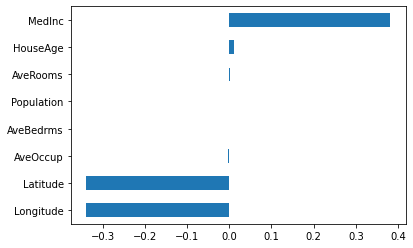

In [ ]:
regressor.coef_
coeff_col=pd.Series(regressor.coef_,index=X.columns)
coeff_col
sorted_coeff=coeff_col.sort_values()
sorted_coeff.plot(kind="barh")

Another way to do feature selection is to use the correlation function

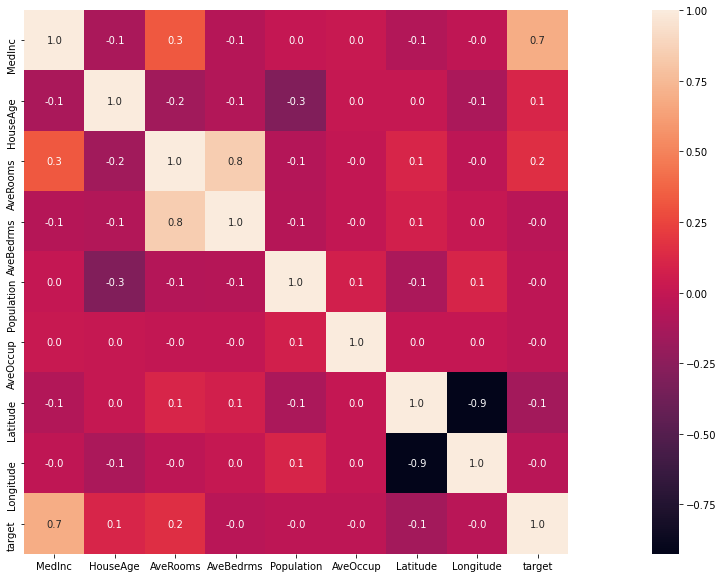

In [ ]:
correlation = copy_data.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

From the above visualizations, we can see that the attribute/column population and avebedrooms will be dropped in the feature extraction phase since they have a coefficient of zero

Feature Extraction by dropping population and avebedrms

In [ ]:
copy_data1=copy_data.drop(['Population','AveBedrms'],1)
copy_data1

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,2.123209,39.43,-121.32,0.847


Performing PCA

In [ ]:
all_features=list(copy_data1.columns)
all_features
X=copy_data1.loc[:,all_features[0]:all_features[-2]].values
y=copy_data1.loc[:,[all_features[-1]]].values
#y

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

standardizing my array using Powertransformer function

In [ ]:
X=PowerTransformer().fit_transform(X)
y=PowerTransformer().fit_transform(y)
X

array([[ 1.90328852,  0.97596837,  1.106394  , -0.3687632 ,  1.08903746,
        -1.30135808],
       [ 1.8970809 , -0.56889299,  0.7123666 , -1.18626485,  1.08240369,
        -1.30135808],
       [ 1.60436139,  1.7610103 ,  1.67364461,  0.00505285,  1.07907856,
        -1.30135808],
       ...,
       [-1.5094258 , -0.90585048,  0.04928114, -0.76445482,  1.54296057,
        -0.85261391],
       [-1.32391444, -0.82037197,  0.13769186, -1.15852734,  1.54296057,
        -0.89748833],
       [-0.8195291 , -0.99224544,  0.084676  , -0.27115865,  1.52740291,
        -0.86757205]])

Performing PCA with 90% variance to find out how many components will be required

In [ ]:
pca_withVar=PCA(0.9)
pca_withVar.fit_transform(X)
pca_withVar.n_components_

4

displaying those 4 components

In [ ]:
pca4=PCA(n_components=4)
pc_s=pca4.fit_transform(X)


In [ ]:
pca_data4 = pd.DataFrame(pc_s, columns=['pc1', 'pc2','pc3','pc4'])
target_data4=pd.DataFrame(y, columns=['target'])
new_data = pd.concat([pca_data4, target_data4], axis=1)
new_data

,pc1,pc2,pc3,pc4,target
0,-2.045517,-1.368902,-0.195918,-1.570045,1.715878
1,-2.053009,-1.649665,-0.968600,-0.031289,1.281389
2,-2.083421,-1.269925,0.207221,-2.305648,1.247506
3,-1.920775,-0.106695,-0.195237,-1.896779,1.188835
4,-2.038976,0.282134,-0.738393,-1.604894,1.193798
...,...,...,...,...,...
20635,-1.548557,1.261411,0.136036,1.007341,-1.414289
20636,-1.584218,-0.082547,0.878182,1.026587,-1.433165
20637,-1.653494,0.850723,-0.239781,1.566656,-1.160803
20638,-1.787205,0.720946,-0.634026,1.439155,-1.293200


So we will need 4 components for a variance of 90%

examining the distribution of the 4 components

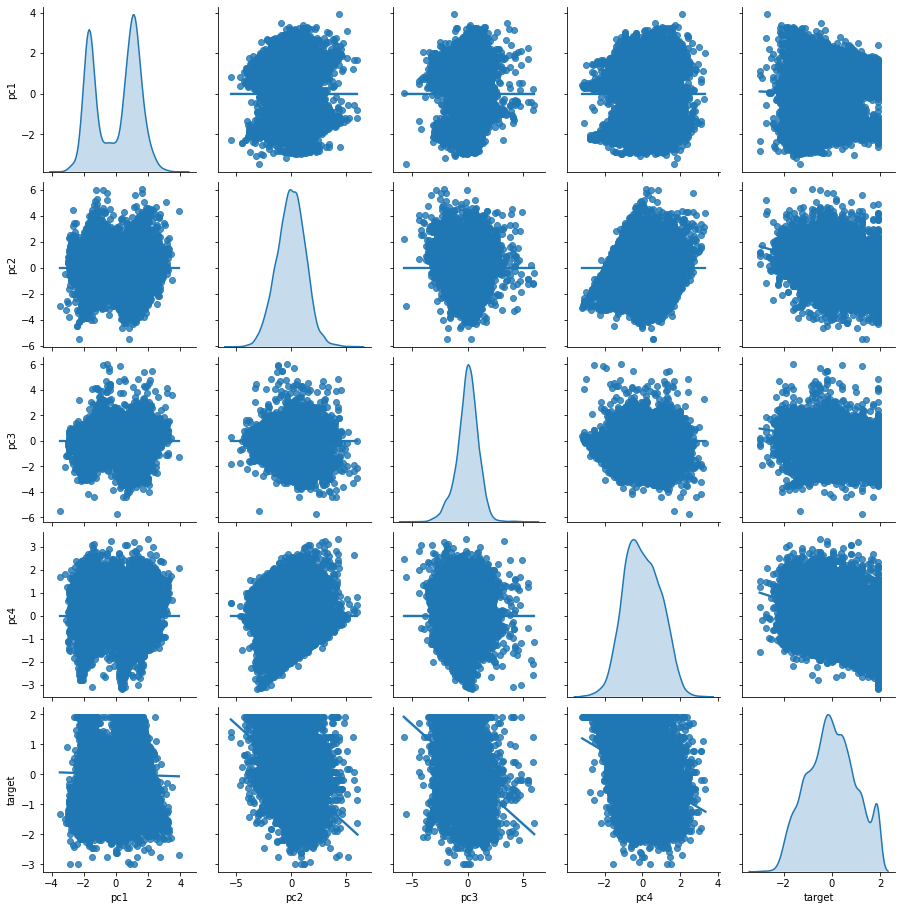

In [ ]:
sns.pairplot(new_data,kind='reg',diag_kind='kde')

### Perform PCA and filter out 2 Principal Components (PC)

In [ ]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)

Creating a dataframe to show the principal component values

In [ ]:
pca_data = pd.DataFrame(pcs, columns=['pc1', 'pc2'])
target_data=pd.DataFrame(y, columns=['target'])
final_data = pd.concat([pca_data, target_data], axis=1)
final_data

,pc1,pc2,target
0,-2.045517,-1.368902,1.715878
1,-2.053009,-1.649665,1.281389
2,-2.083421,-1.269925,1.247506
3,-1.920775,-0.106695,1.188835
4,-2.038976,0.282134,1.193798
...,...,...,...
20635,-1.548557,1.261411,-1.414289
20636,-1.584218,-0.082547,-1.433165
20637,-1.653494,0.850723,-1.160803
20638,-1.787205,0.720946,-1.293200


Determine the percentage of information carried by the above 2 Principal Component

In [ ]:
pca.explained_variance_ratio_

array([0.33334434, 0.27921204])

Examinig the distribution of the 2 components

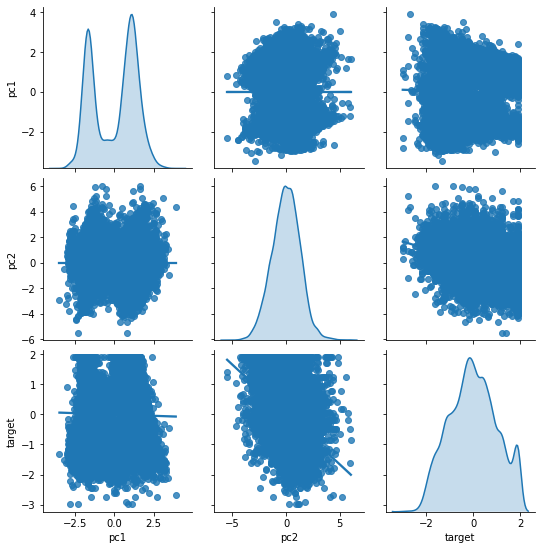

In [ ]:
sns.pairplot(final_data,kind='reg',diag_kind='kde')

Data distribution examination using seaborn of all extracted features to the target

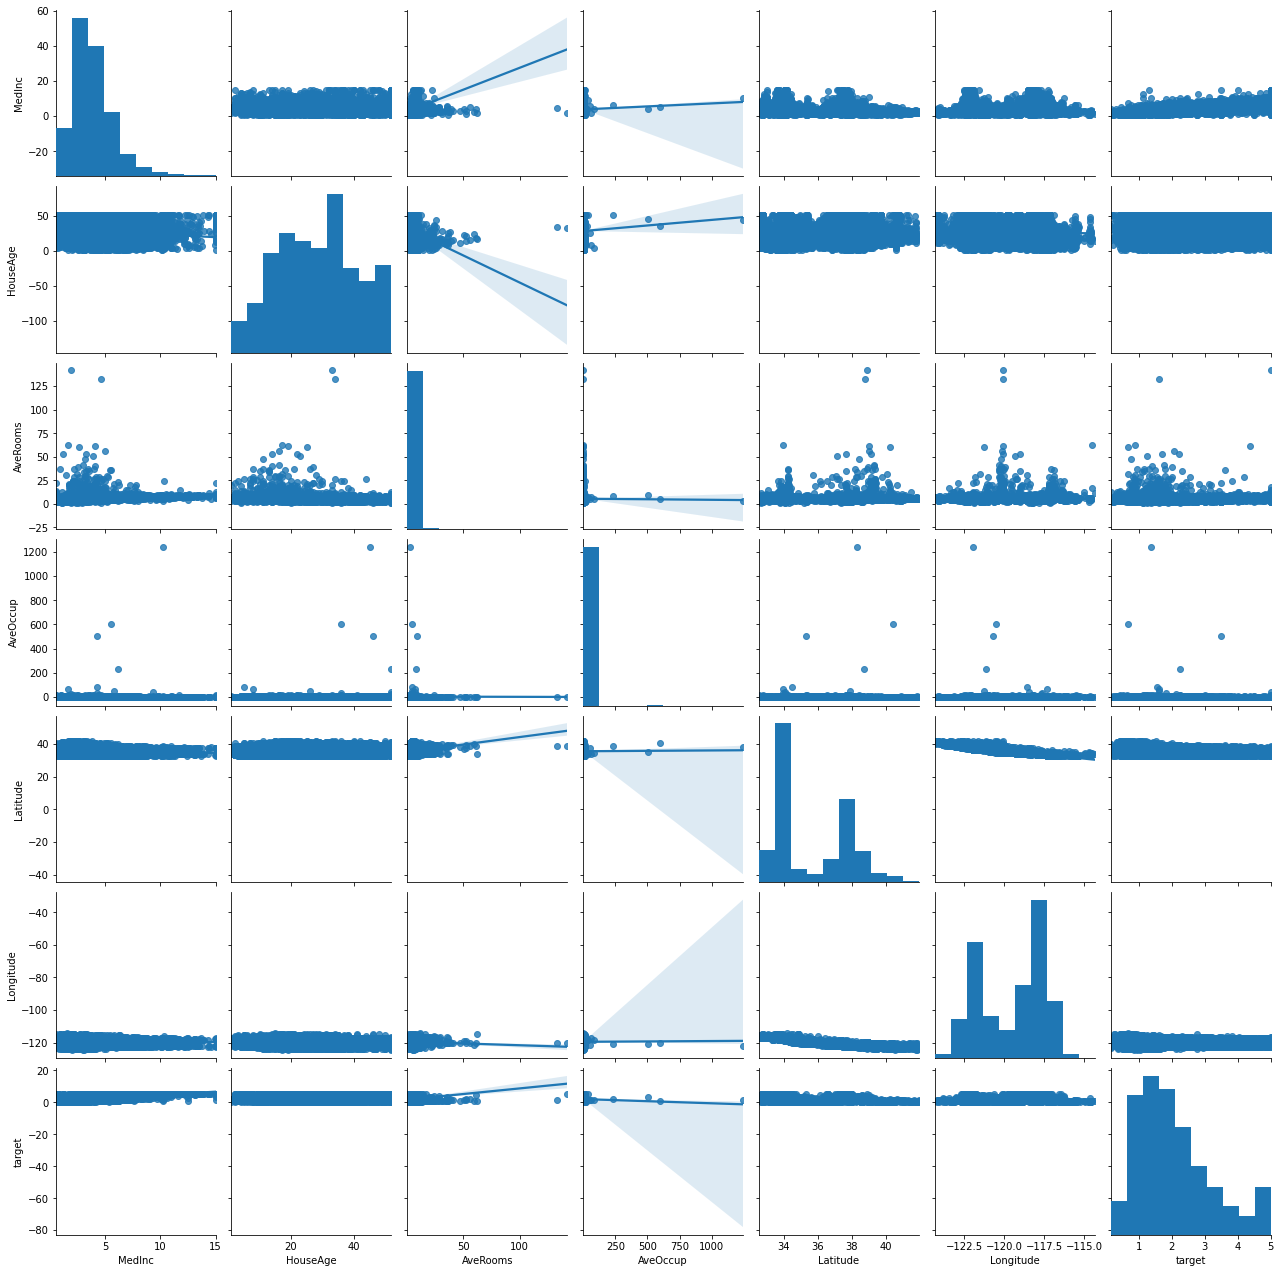

In [ ]:
#copy_data1
ditr=sns.pairplot(copy_data1,kind='reg')

Now we can train our models with our new data to choose the best model

changing our final data to be used in training into an array.
I will be using the 4 principle components that give 90% variance

In [ ]:
#new_data
new_data_array=new_data.to_numpy()
new_data_array

array([[-2.04551726, -1.3689016 , -0.19591816, -1.57004543,  1.71587846],
       [-2.05300859, -1.64966531, -0.96860022, -0.03128904,  1.28138932],
       [-2.0834209 , -1.2699249 ,  0.20722122, -2.30564843,  1.24750645],
       ...,
       [-1.65349425,  0.85072322, -0.2397807 ,  1.56665638, -1.1608032 ],
       [-1.78720452,  0.72094564, -0.63402595,  1.43915524, -1.29319971],
       [-1.60413193,  0.33289322,  0.17908881,  1.36775861, -1.21047554]])

In [ ]:
allfeatures=list(new_data.columns)
allfeatures
X_2=new_data.loc[:,allfeatures[0]:allfeatures[-2]].values
y_2=new_data.loc[:,[allfeatures[-1]]].values
y_2

array([[ 1.71587846],
       [ 1.28138932],
       [ 1.24750645],
       ...,
       [-1.1608032 ],
       [-1.29319971],
       [-1.21047554]])

Now we can split our data in to train and test data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_2,y_2,test_size = 0.33,random_state = 10)

1. Training the Lasso model 

In [64]:
regressorLass = LassoCV()
regressorLass.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [65]:
regressorLass.score(X_test, y_test)

0.42855484947008765

In [86]:
lasso = regressorLass.score(X_test, y_test)

accuraLass = pd.DataFrame([['LassoCV', lasso]],
               columns = ['Model', 'Accuracy'])

accuraLass

,Model,Accuracy
0,LassoCV,0.428555


2. Training the Linear regression model

In [67]:
regressorLin= LinearRegression()
regressorLin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
regressorLin.score(X_test,y_test)

0.4286239296169879

In [85]:
lin = regressorLin.score(X_test, y_test)

accuraLin = pd.DataFrame([['LinearReg', lin]],
               columns = ['Model', 'Accuracy'])

accuraLin

,Model,Accuracy
0,LinearReg,0.428624


3. Training the Ridge model

In [71]:
regressorRi=Ridge()
regressorRi.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
regressorRi.score(X_test,y_test)

0.4286221872734013

In [84]:
rid = regressorRi.score(X_test, y_test)

accuraRi = pd.DataFrame([['LinearReg', rid]],
               columns = ['Model', 'Accuracy'])

accuraRi

,Model,Accuracy
0,LinearReg,0.428622


4. Training Random forest regressor

In [97]:
regressorRf=RandomForestRegressor(n_estimators =10, random_state = 42)
regressorRf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [98]:
regressorRf.score(X_test,y_test)

0.5817246043861084

In [99]:
fore = regressorRf.score(X_test, y_test)

accuraRf = pd.DataFrame([['LinearReg', fore]],
               columns = ['Model', 'Accuracy'])

accuraRf

,Model,Accuracy
0,LinearReg,0.581725


5.Training Elastic net regressor

In [88]:
regressorEl=ElasticNet()
regressorEl.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
regressorEl.score(X_test,y_test)

0.02592508870878596

In [90]:
ela = regressorEl.score(X_test, y_test)

accuraEl = pd.DataFrame([['LinearReg', ela]],
               columns = ['Model', 'Accuracy'])

accuraEl

,Model,Accuracy
0,LinearReg,0.025925


In [103]:
results={}
models={'LinearRegression':lin,
        'Lasso':lasso,
        'Ridge':rid,
        'ElasticNet':ela
        }
for i in models:
  values=models[i]
  results[i]=[values]
pd.DataFrame(results)


,LinearRegression,Lasso,Ridge,ElasticNet
0,0.428624,0.428555,0.428622,0.025925


From the above results from model selection,  we can seee that the best models are Linear Regression, Ridge,Lasso then Elastic in that order

Demonstrating KFold cross validation using Linear Regression to show how accuracy is affected

In [117]:
kfold=KFold(n_splits=100)

c_validated=cross_val_score(regressorLin,X_train,y_train,cv=kfold)
accuracy=c_validated.mean()
accuracy


0.4060460047247581

In [118]:
kfold=KFold(n_splits=2)

c_validated=cross_val_score(regressorLin,X_train,y_train,cv=kfold)
accuracy=c_validated.mean()
accuracy

0.4118102397519564

We can see above that the accuracy of the model reduces when you increase the value of K.This is because when K is increased the performance of the models increases thus the model requires more training data to avoid overfitting.